In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
customer_churn = pd.read_csv('/content/Churn_Modelling.csv')

In [141]:
customer_churn.shape

(10000, 14)

In [142]:
customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:
customer_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes')

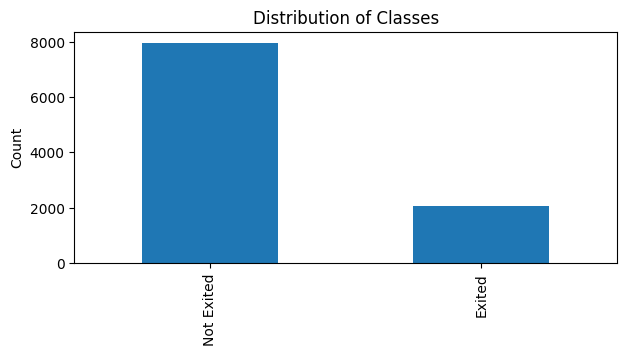

In [144]:
plt.figure(figsize = (7,3))
customer_churn['Exited'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Not Exited', 'Exited'])
plt.ylabel("Count")
plt.title("Distribution of Classes")

The above observation indicates that the dataset is imbalanced by 80:20 ratio where 80% of the data indicates for Class 0(Not Exited) and 20% of the data indicates for Class 1(Exited).

In [145]:
customer_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<ipython-input-146-17ef7beea820>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customer_churn.corr(), annot=True)


<Axes: >

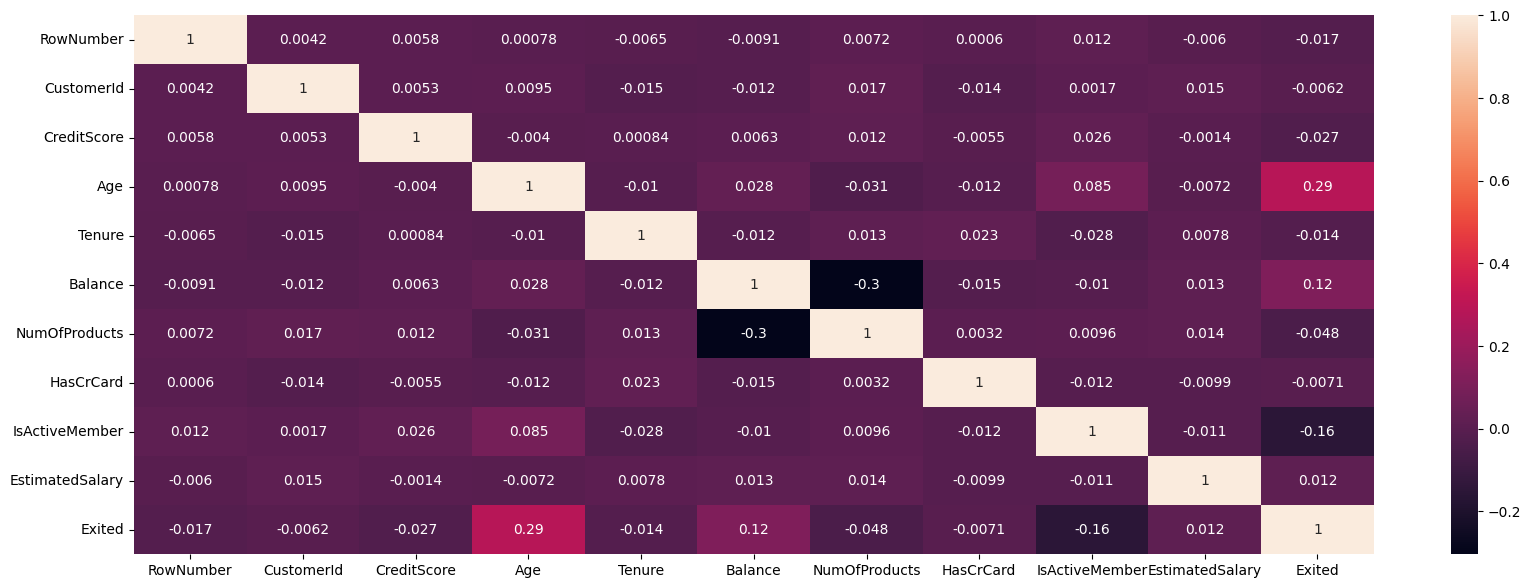

In [146]:
plt.figure(figsize=(20,7))
sns.heatmap(customer_churn.corr(), annot=True)

In [147]:
nums = customer_churn.select_dtypes(include=['float64', 'int64']).columns.to_numpy()
nums

array(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'], dtype=object)

In [148]:
customer_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [149]:
customer_churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [150]:
customer_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [151]:
geography = pd.get_dummies(customer_churn['Geography'], drop_first=True)

In [152]:
gender = pd.get_dummies(customer_churn['Gender'], drop_first=True)

In [153]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [154]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [155]:
customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [156]:
customer_churn_new = pd.concat([customer_churn, geography, gender], axis=1)

In [157]:
customer_churn_new.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [158]:
customer_churn_new = customer_churn_new.drop(['Geography', 'Gender'], axis=1)

In [159]:
customer_churn_new.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [160]:
customer_churn_new.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [161]:
customer_churn_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [162]:
customer_churn_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [163]:
customer_churn_new.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [164]:
customer_churn_new.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Germany            0
Spain              0
Male               0
dtype: int64

<ipython-input-165-444362f127ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn_new['CreditScore'])


<Axes: xlabel='CreditScore', ylabel='Density'>

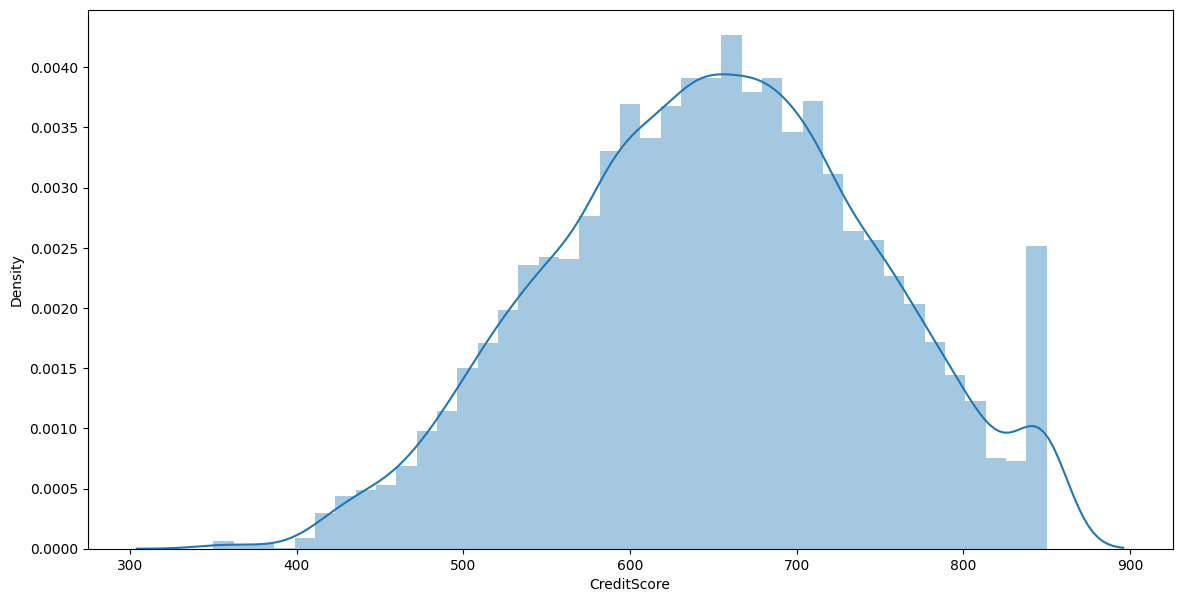

In [165]:
plt.figure(figsize=(14,7))
sns.distplot(customer_churn_new['CreditScore'])

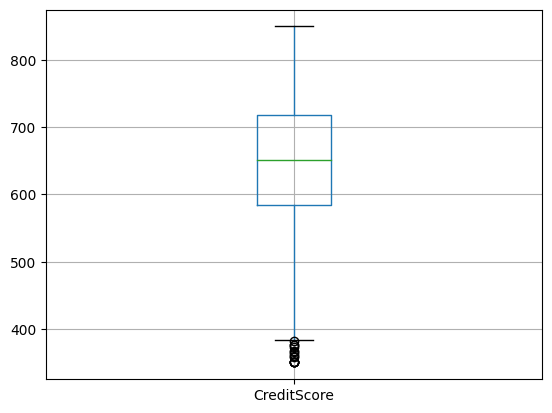

In [166]:
# To check the outliers
figure = customer_churn_new.boxplot(column = 'CreditScore')

In [167]:
upper_boundary = customer_churn_new['CreditScore'].mean() + 3 * customer_churn_new['CreditScore'].std()
lower_boundary = customer_churn_new['CreditScore'].mean() - 3 * customer_churn_new['CreditScore'].std()
print(upper_boundary), print(lower_boundary), print(customer_churn_new['CreditScore'].mean())

940.488696208391
360.568903791609
650.5288


(None, None, None)

<ipython-input-168-28f04ab696b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_churn_new['Age'])


<Axes: xlabel='Age', ylabel='Density'>

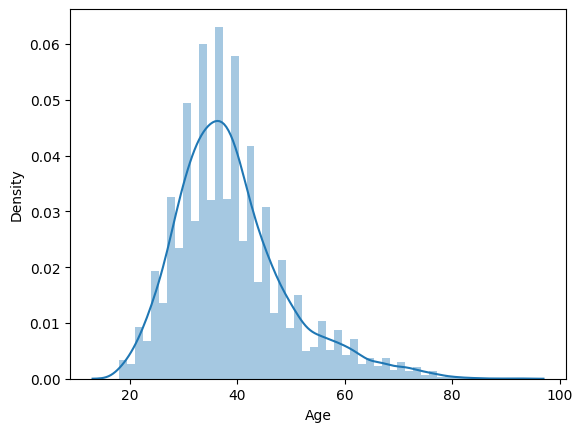

In [168]:
sns.distplot(customer_churn_new['Age'])

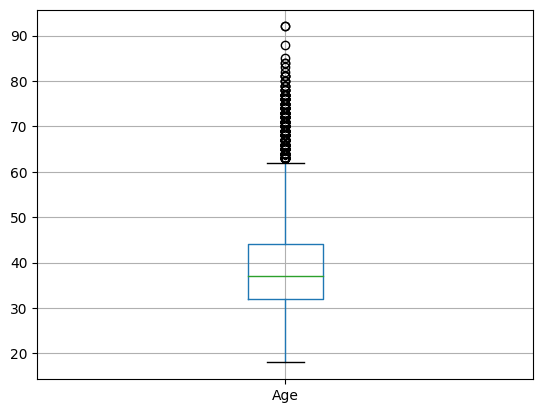

In [169]:
figure = customer_churn_new.boxplot(column = 'Age')

Text(0, 0.5, 'No of bank customers')

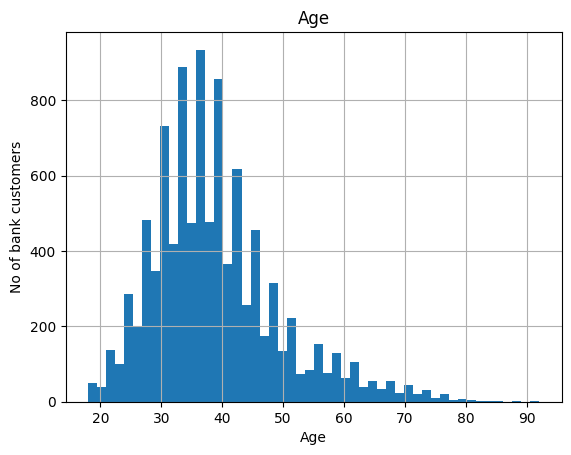

In [170]:
figure = customer_churn_new.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of bank customers')

In [171]:
upper_boundary = customer_churn_new['Age'].mean() + 3 * customer_churn_new['Age'].std()
lower_boundary = customer_churn_new['Age'].mean() - 3 * customer_churn_new['Age'].std()
print(upper_boundary), print(lower_boundary), print(customer_churn_new['Age'].mean())

70.38521935511383
7.458380644886169
38.9218


(None, None, None)

In [172]:
customer_churn_new.loc[customer_churn_new['CreditScore']<360.6, 'CreditScore'] = 360.6

In [173]:
customer_churn_new.loc[customer_churn_new['Age']>70, 'Age'] = 70

In [174]:
customer_churn_new.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619.0,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608.0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502.0,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699.0,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850.0,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645.0,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822.0,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376.0,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501.0,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684.0,27,2,134603.88,1,1,1,71725.73,0,0,0,1


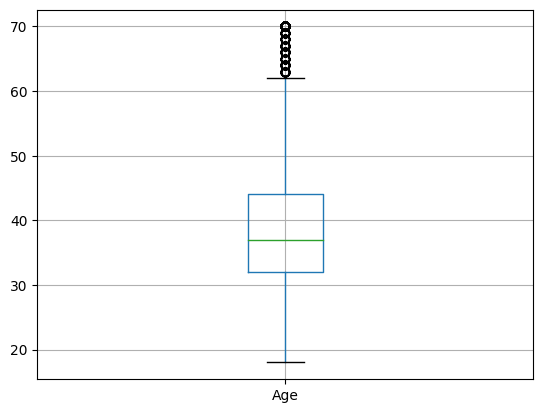

In [175]:
figure = customer_churn_new.boxplot(column = 'Age')

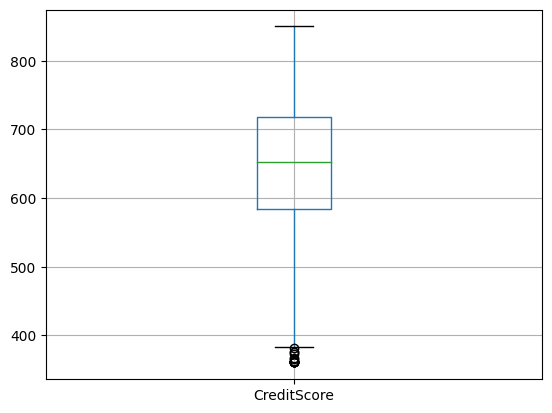

In [176]:
figure = customer_churn_new.boxplot(column = 'CreditScore')

In [177]:
X = customer_churn_new.drop('Exited', axis=1)
Y = customer_churn_new['Exited']

In [178]:
X.shape, Y.shape

((10000, 11), (10000,))

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [180]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [181]:
X_train, X_test

(array([[ 1.0822509 , -0.08892262, -1.38674763, ...,  1.71312429,
         -0.57493089, -1.08347268],
        [-1.1376865 , -0.38047219,  0.68648771, ...,  1.71312429,
         -0.57493089, -1.08347268],
        [ 1.09257619, -0.18610581, -0.69566918, ..., -0.58372881,
         -0.57493089,  0.92295821],
        ...,
        [ 0.5556611 ,  0.88290928,  1.03202694, ..., -0.58372881,
          1.7393395 ,  0.92295821],
        [-0.64207257, -0.47765538,  0.34094849, ..., -0.58372881,
          1.7393395 ,  0.92295821],
        [-0.14645864,  0.98009247,  0.34094849, ...,  1.71312429,
         -0.57493089,  0.92295821]]),
 array([[ 0.18395065, -1.06075452, -1.38674763, ...,  1.71312429,
         -0.57493089, -1.08347268],
        [ 0.17362536, -0.38047219, -0.35012996, ..., -0.58372881,
          1.7393395 ,  0.92295821],
        [ 0.81379335, -0.283289  ,  1.03202694, ..., -0.58372881,
         -0.57493089, -1.08347268],
        ...,
        [-1.53004752,  0.59135971, -1.73228685, ..., -

In [182]:
# Ensemble Technique

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = XGBClassifier()
clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [183]:
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[2259  146]
 [ 297  298]]
0.8523333333333334
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2405
           1       0.67      0.50      0.57       595

    accuracy                           0.85      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [184]:
#Cross Validation (Stratified KFold)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [185]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [186]:
log_class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1', 'l2']}
cv = StratifiedKFold(n_splits=5)

In [187]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [188]:
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[2317   88]
 [ 464  131]]
0.816
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2405
           1       0.60      0.22      0.32       595

    accuracy                           0.82      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.79      0.82      0.78      3000



In [189]:
#Over Sampling

from collections import Counter
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_os, Y_train_os = os.fit_resample(X_train, Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 5558, 1: 1442})
The number of classes after fit Counter({0: 5558, 1: 5558})


In [190]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)
clf.fit(X_train_os, Y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[2115  290]
 [ 235  360]]
0.825
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2405
           1       0.55      0.61      0.58       595

    accuracy                           0.82      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.83      0.82      0.83      3000



In [192]:
# SMOTE

from imblearn.combine import SMOTETomek

sm = SMOTETomek()
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({0: 5558, 1: 1442})
The number of classes after fit Counter({0: 5558, 1: 5558})


In [193]:
clf = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)
clf.fit(X_train_sm, Y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [194]:
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[2215  190]
 [ 263  332]]
0.849
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2405
           1       0.64      0.56      0.59       595

    accuracy                           0.85      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.84      0.85      0.85      3000

